In [2]:
import mne

vhdr_fname = "../../static/2022_01_14_T05_U002/2022_01_14_T05_U002_EEG01.vhdr"
misc_list = []
for i in range(18):
    misc_list.append(i+64)

# read raw data
raw = mne.io.read_raw_brainvision(vhdr_fname, misc=misc_list, preload=True,
    verbose=False)
raw.info['line_freq'] = 500.

# Set montage
montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(montage, verbose=False)

# Set common average reference
raw.set_eeg_reference('average', projection=False, verbose=False)

<RawBrainVision | 2022_01_14_T05_U002_EEG01.eeg, 82 x 282678 (565.4 s), ~177.0 MB, data loaded>

In [24]:
evts = [35000, 100000, 150000]

In [37]:
mne.events_from_annotations(raw)[1:]

Used Annotations descriptions: ['Stimulus/2', 'Stimulus/3', 'Stimulus/8888']


({'Stimulus/2': 10001, 'Stimulus/3': 10002, 'Stimulus/8888': 10003},)

In [10]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 EEG, 18 MISC
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 line_freq: 500.0
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 82
 projs: []
 sfreq: 500.0 Hz
>

In [7]:
mne.pick_types(raw.info, eeg=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

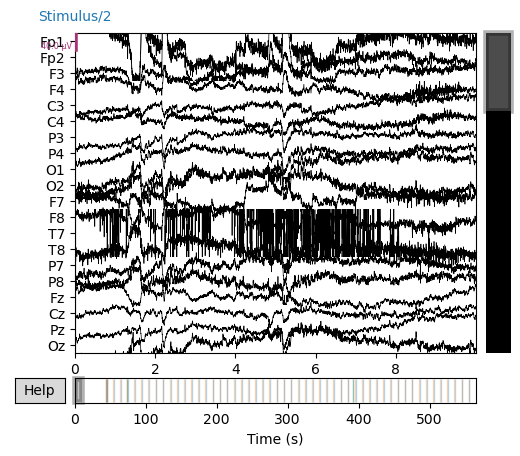

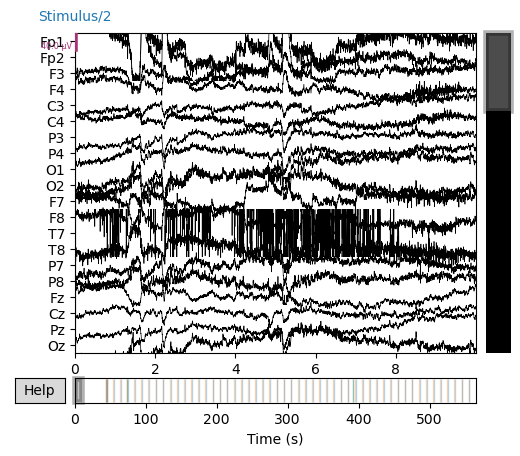

In [8]:
raw.plot()

In [25]:
mne.Epochs(raw, evts)

ValueError: events must be of shape (N, 3), got (3,)